In [1]:
#importing  dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston

In [4]:
# understanding the dataset 
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#Access data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [23]:
#Resahping data
data = dataset[:,12].reshape(-1,1)


In [70]:
#Shape of the data
np.shape(dataset)

(506, 13)

In [12]:
#Target values
target = boston.target.reshape(-1,1)

In [13]:
#Shape of the target
np.shape(target)

(506, 1)

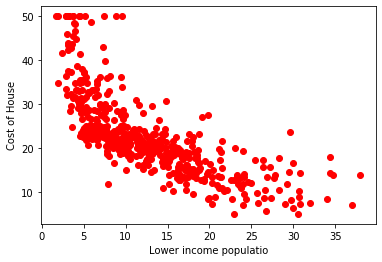

In [31]:
#Ensuring that matplotlib is working in the notebook
%matplotlib inline
plt.scatter(data, target, color = 'red')
plt.xlabel("Lower income population")
plt.ylabel("Cost of House")
plt.show()

In [25]:
#Regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
#Creating a regression model
reg = LinearRegression()

#Fit the model 
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Prediction
pred = reg.predict(data)

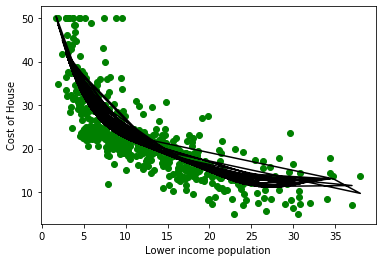

In [71]:
#With regression line 
%matplotlib inline
plt.scatter(data, target, color = 'green')
plt.plot(data, pred, color = 'black')
plt.xlabel("Lower income population")
plt.ylabel("Cost of House")
plt.show()

In [35]:
#Circumventing curve issue using polynomial model 
from sklearn.preprocessing import PolynomialFeatures

#To allow merging of models 
from sklearn.pipeline import make_pipeline

In [64]:
model = make_pipeline(PolynomialFeatures(5),reg)

In [65]:
model.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [66]:
pred = model.predict(data)

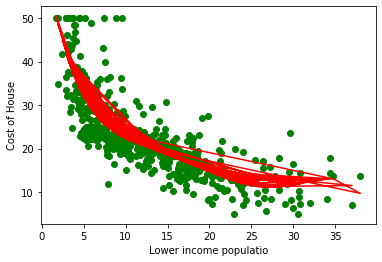

In [67]:
#With regression line 
%matplotlib inline
plt.scatter(data, target, color = 'green')
plt.plot(data, pred, color = 'red')
plt.xlabel("Lower income populatio")
plt.ylabel("Cost of House")
plt.show()

In [68]:
#r^2 matric
from sklearn.metrics import r2_score

In [69]:
#Predict 
r2_score(pred,target)

0.5330569910246515